In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("hour.csv")

In [3]:
df.shape

(17379, 17)

In [4]:
df.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40


In [5]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
import warnings
warnings.filterwarnings('ignore') 
#this is for the pink warning which can be run first

In [7]:
# Checking for null values in the data and droping records with NAs.
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no null values present.

# Sanity Check

In [8]:
np.sum((df.casual + df.registered)!= df.cnt)

0

In [9]:
#len(df.index)

In [10]:
#df.drop(df.index[df.registered + df.casual != df.cnt], axis = 0,inplace = True)

In [11]:
len(df.index)

17379

In [12]:
# Month values should be 1-12 only
df = df[(df.mnth>=1) & (df.mnth<=12)]

In [13]:
#Hour values should be 0-23
df = df[(df.hr>=0) & (df.hr<=23)]
df["hr"]

0         0
1         1
2         2
3         3
4         4
         ..
17374    19
17375    20
17376    21
17377    22
17378    23
Name: hr, Length: 17379, dtype: int64

In [15]:
columns_to_drop = ["casual", "registered", "dteday", "instant"]

In [16]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [17]:
inp1 = df.drop(columns_to_drop, axis = 1).copy()

In [18]:
inp1.head(3)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32


In [19]:
# Describing the numerical field in the dataset using pandas describe method
inp1.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


<AxesSubplot:ylabel='Density'>

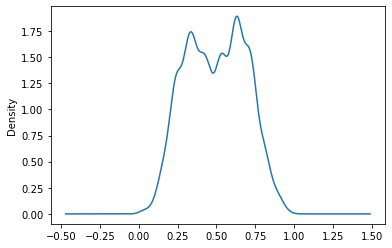

In [22]:
inp1.temp.plot.density()

(array([ 117.,  953., 2444., 2913., 2433., 2684., 3150., 1976.,  625.,
          84.]),
 array([0.02 , 0.118, 0.216, 0.314, 0.412, 0.51 , 0.608, 0.706, 0.804,
        0.902, 1.   ]),
 <BarContainer object of 10 artists>)

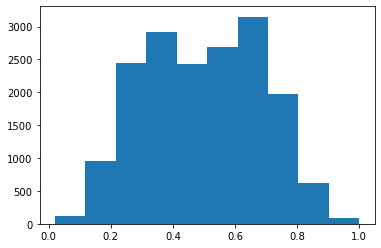

In [28]:
# histogram
import matplotlib.pyplot as plt
plt.hist(inp1["temp"])

<AxesSubplot:xlabel='atemp'>

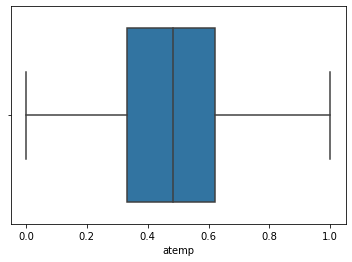

In [29]:
sns.boxplot(inp1.atemp)
# Shows a clean dataset with no outliers in the boxplot.

(array([  23.,   55.,  696., 1481., 2641., 3084., 2940., 2384., 2900.,
        1175.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

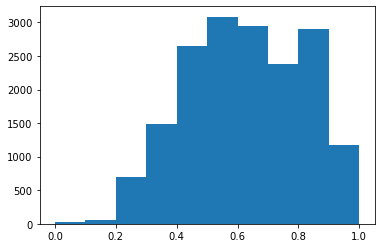

In [30]:
# Histogram for "hum" or humidity.
plt.hist(inp1["hum"])

<AxesSubplot:ylabel='Density'>

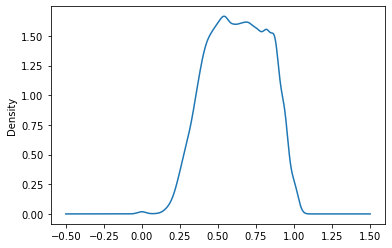

In [32]:
# Pattern of the distribution
inp1.hum.plot.density()

In [ ]:
# There are some abnormally low values in the columns

<AxesSubplot:ylabel='Density'>

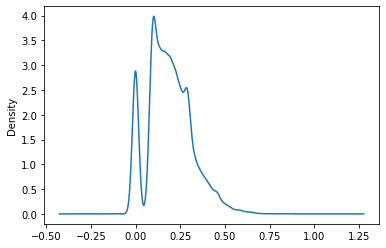

In [33]:
# Density plot for windspeed
inp1.windspeed.plot.density()

<AxesSubplot:ylabel='Density'>

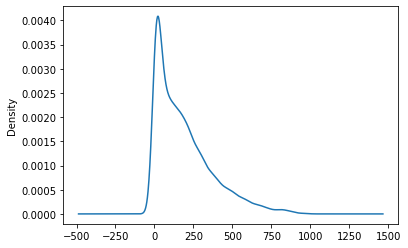

In [34]:
# Box and density plot for cnt – this is the variable of interest
inp1.cnt.plot.density()

<AxesSubplot:xlabel='cnt'>

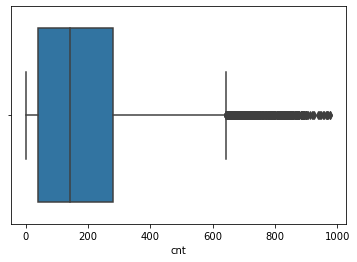

In [35]:
sns.boxplot(inp1.cnt)

In [ ]:
# Both the density plot and box plot provides the same insight. 

In [36]:
# Finding out the percentiles: 10, 25, 50, 75, 90, 95, 99
inp1.cnt.quantile([0.1,0.25,0.5,0.7,0.9,0.95,0.99])

0.10      9.00
0.25     40.00
0.50    142.00
0.70    244.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: cnt, dtype: float64

In [37]:
# Deciding the cutoff percentile and dropping the records with values higher than the cutoff in the new dataframe.
inp2 = inp1[inp1.cnt<563].copy()

In [38]:
inp2.head(3)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32


In [40]:
# df with outliers
inp1.shape

(17379, 13)

In [41]:
#df without outliers
inp2.shape

(16502, 13)

# Bivariate analysis

<AxesSubplot:xlabel='hr', ylabel='cnt'>

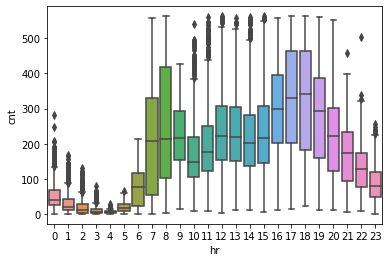

In [43]:
#boxplot for cnt vs. hour
# hr - x axis, cnt - y axis
sns.boxplot("hr", "cnt", data= inp2)

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

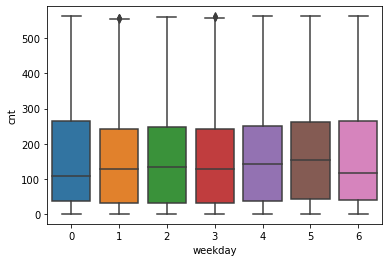

In [45]:
# Boxplot for weekday and cnt
# weekday - x axis, cnt - y axis
sns.boxplot("weekday", "cnt", data = inp2)

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

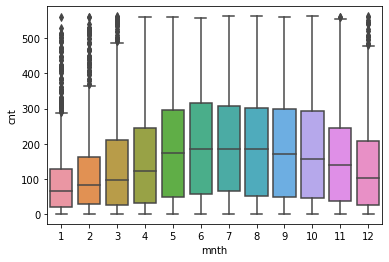

In [47]:
# boxplot for cnt vs. month
# mnth - x axis , cnt - y axis
sns.boxplot("mnth", "cnt", data = inp2)

<AxesSubplot:xlabel='season', ylabel='cnt'>

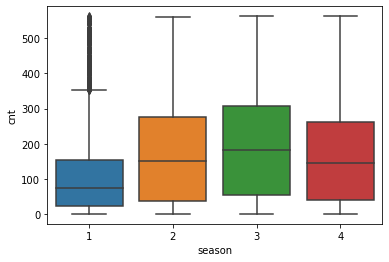

In [48]:
# boxplot for cnt vs. season
#season -x axis, cnt - y axis 
sns.boxplot("season", "cnt", data = inp2)

In [51]:
# Making a bar plot with the median value of cnt for each hr
hour_cnt_median=inp2.groupby('hr')['cnt'].agg('median')

In [52]:
hour_cnt_median

hr
0      40.0
1      20.0
2      11.0
3       6.0
4       6.0
5      19.0
6      76.0
7     207.5
8     214.0
9     216.0
10    147.0
11    178.0
12    223.0
13    218.0
14    203.0
15    217.0
16    298.0
17    331.0
18    340.0
19    294.0
20    223.0
21    173.0
22    129.0
23     80.0
Name: cnt, dtype: float64

<BarContainer object of 24 artists>

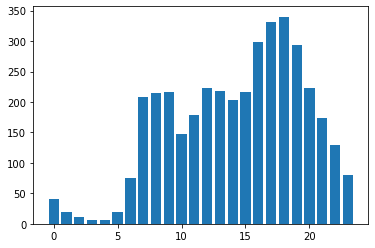

In [54]:
plt.bar(inp2["hr"].unique(),hour_cnt_median)

In [55]:
# Making a correlation matrix for variables atemp, temp, hum, and windspeed
var = ["atemp", "temp", "hum", "windspeed"]

In [56]:
inp2[var].corr()

,atemp,temp,hum,windspeed
atemp,1.000000,0.988218,-0.025747,-0.073985
temp,0.988218,1.000000,-0.042603,-0.033209
hum,-0.025747,-0.042603,1.000000,-0.288648
windspeed,-0.073985,-0.033209,-0.288648,1.000000


<AxesSubplot:>

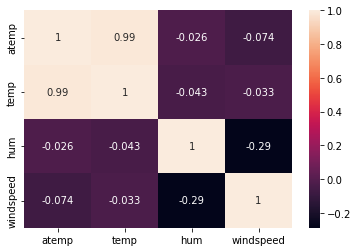

In [57]:
sns.heatmap(inp2[var].corr(), annot = True)

# Data preprocessing

In [58]:
#creating another variable inp3 so that it doesn't disturb inp2
inp3 = inp2.copy()

In [63]:
# For values 5,6,7,8,9,10, replace with a single value 5.
# all thes values are convered to 5 with isin function
inp3.mnth[inp3.mnth.isin([5,6,7,8,9,10])]=5

In [64]:
np.unique(inp3.mnth)

array([ 1,  2,  3,  4,  5, 11, 12], dtype=int64)

In [65]:
inp3.hr[inp3.hr.isin([0,1,2,3,4,5])]=0
inp3.hr[inp3.hr.isin([11,12,13,14,15])]=11

In [66]:
cat_cols=['season','weathersit','weekday','mnth','hr']

In [67]:
inp3 = pd.get_dummies(inp3, columns = cat_cols, drop_first = True) # drop first is removing seaoson_2 from the table

In [68]:
inp3.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'weathersit_2',
       'weathersit_3', 'weathersit_4', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_11', 'mnth_12', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10',
       'hr_11', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22',
       'hr_23'],
      dtype='object')

In [69]:
#Train test split
from sklearn.model_selection import train_test_split

In [70]:
# X_train,X_test,y_train,y_test=train_test_split(in,test_size=0.3,random_state=100)
df_train,df_test = train_test_split(inp3, train_size = 0.7, random_state = 100)

In [72]:
# calling the new dataframes df_train and df_test
df_train.shape

(11551, 40)

In [73]:
df_test.shape

(4951, 40)

In [74]:
y_train = df_train.pop("cnt")
X_train = df_train

In [75]:
y_test = df_test.pop("cnt")
X_test = df_test

In [76]:
X_train.shape

(11551, 39)

In [77]:
y_train.shape

(11551,)

In [78]:
X_test.shape

(4951, 39)

In [79]:
y_test.shape

(4951,)

# Model building

In [82]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [83]:
model.fit(X_train, y_train)

LinearRegression()

In [92]:
y_preds = model.predict(X_test) # Later is also used for "r2_score"

In [93]:
model.score(X_test, y_test)

0.6644758139433202

In [ ]:
# Reporting the R2 on the train set

In [94]:
from sklearn.metrics import r2_score

In [95]:
y_train_preds = model.predict(X_train)

In [96]:
#r2_score(X_train, model.predict(X_train))
r2_score(y_train, y_train_preds)

0.670115035460752

In [97]:
r2_score(y_test,y_preds)

0.6644758139433202

In [98]:
r2_score(y_test,y_preds)

0.6644758139433202

In [99]:
inp3.to_excel("Final_data.xlsx")